<a href="https://colab.research.google.com/github/RayenNacef/CV/blob/main/iinn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
##inline display for graphs and any visualization
%matplotlib inline


In [2]:
#from google.colab import drive #donner l acces a google drive
#drive.mount('/content/drive')

In [2]:
import csv 
dt = r'C:\Users\Rayen\Desktop\Vehicles\VehiclesPrediction\Ppp - Feuille 1 (1).csv'
csv_data= []
with open(dt, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        csv_data.append(row)
        

In [5]:
import pandas as pd
csv_file_path = r'C:\Users\Rayen\Desktop\Vehicles\VehiclesPrediction\Ppp - Feuille 1 (1).csv'
dt = pd.read_csv(csv_file_path)

# Get the shape of the DataFrame
data_shape = dt.shape
print("Data shape:", data_shape)
dt.shape

Data shape: (156, 6)


(156, 6)

In [6]:
##preparing the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time [s]             156 non-null    float64
 1   Battery Voltage [V]  156 non-null    float64
 2   Motor Torque [Nm]    156 non-null    float64
 3   Battery Current [A]  156 non-null    float64
 4   Battery Temperature  156 non-null    float64
 5   etat                 156 non-null    float64
dtypes: float64(6)
memory usage: 7.4 KB


In [7]:
#summarize the state of the data
dt.describe()

,Time [s],Battery Voltage [V],Motor Torque [Nm],Battery Current [A],Battery Temperature,etat
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,7.750000,272.653462,38.056859,8.121667,46.060897,0.551282
std,4.517743,186.063476,62.780110,103.312783,30.768597,0.436923
min,0.000000,13.190000,-170.200000,-402.530000,-1.380000,0.000000
25%,3.875000,83.400000,3.375000,-12.202500,23.560000,0.000000
50%,7.750000,383.350000,42.060000,-9.710000,35.580000,0.500000
75%,11.625000,387.487500,83.300000,100.000000,83.300000,1.000000
max,15.500000,577.710000,150.180000,186.200000,89.200000,1.000000


In [8]:
#check the missing values
dt.isnull().sum()

Time [s]               0
Battery Voltage [V]    0
Motor Torque [Nm]      0
Battery Current [A]    0
Battery Temperature    0
etat                   0
dtype: int64

In [9]:
#exploratory data analysis
#corrolation
dt.corr()


,Time [s],Battery Voltage [V],Motor Torque [Nm],Battery Current [A],Battery Temperature,etat
Time [s],1.000000,-0.154208,-0.320328,-0.388109,0.087155,0.219313
Battery Voltage [V],-0.154208,1.000000,-0.060145,0.165260,-0.962151,0.758703
Motor Torque [Nm],-0.320328,-0.060145,1.000000,-0.142740,0.105401,-0.443348
Battery Current [A],-0.388109,0.165260,-0.142740,1.000000,-0.106865,-0.061212
Battery Temperature,0.087155,-0.962151,0.105401,-0.106865,1.000000,-0.766046
etat,0.219313,0.758703,-0.443348,-0.061212,-0.766046,1.000000


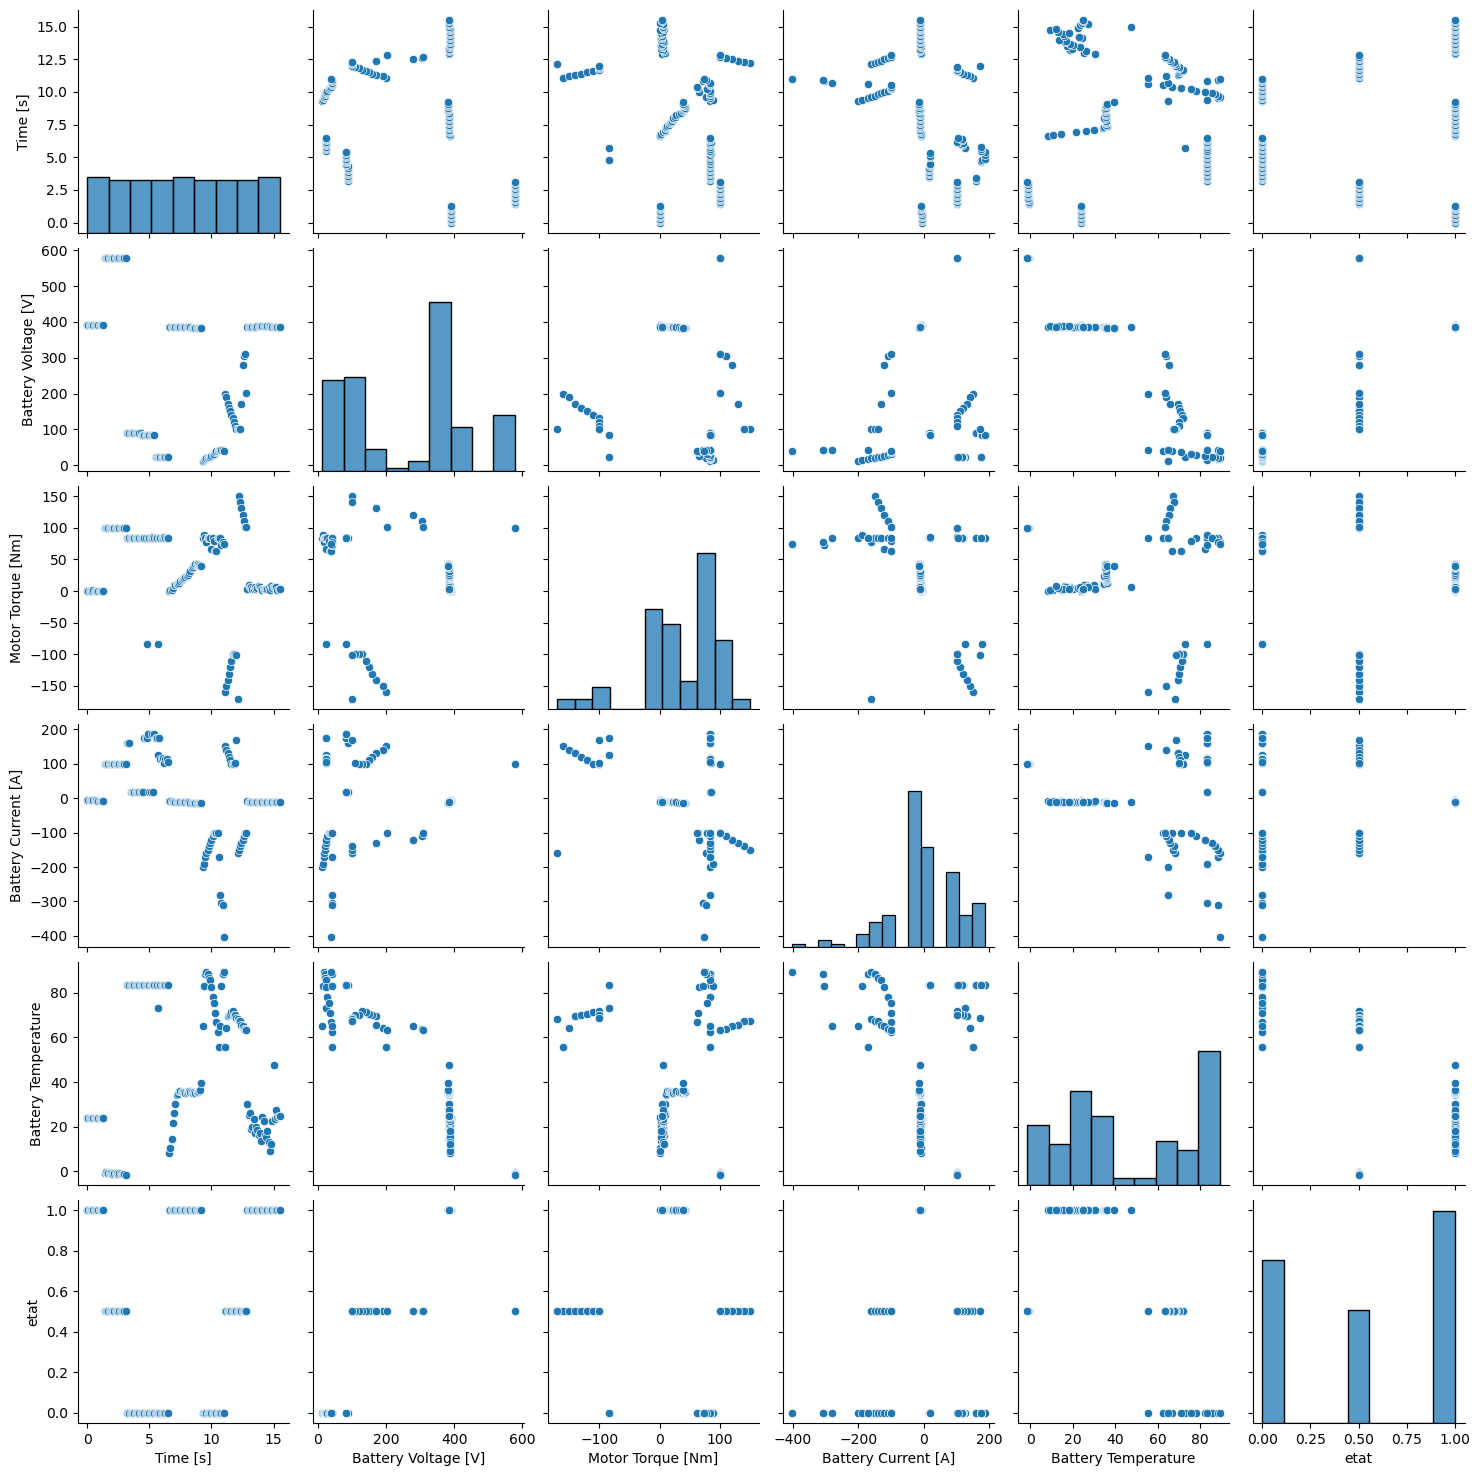

In [10]:
import seaborn as sns
#to see how the x and y are corrolated
sns.pairplot(dt)


Text(0, 0.5, 'Battery Voltage [V]')

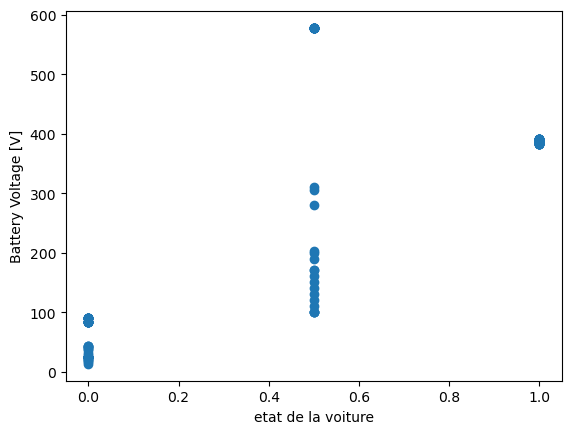

In [12]:
import matplotlib.pyplot as plt
#see the relationship between two faetures

plt.scatter(dt['etat'],dt['Battery Voltage [V]'])
plt.xlabel("etat de la voiture")
plt.ylabel("Battery Voltage [V]")

Text(0, 0.5, 'Battery Temperature')

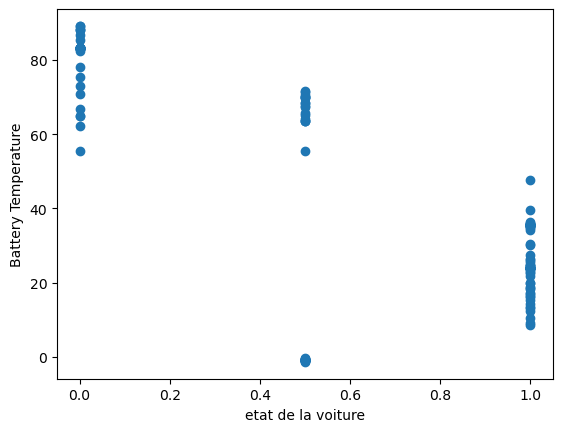

In [13]:

#see the relationship between two faetures
plt.scatter(dt['etat'],dt['Battery Temperature'])
plt.xlabel("etat de la voiture")
plt.ylabel("Battery Temperature")

<Axes: xlabel='etat', ylabel='Battery Voltage [V]'>

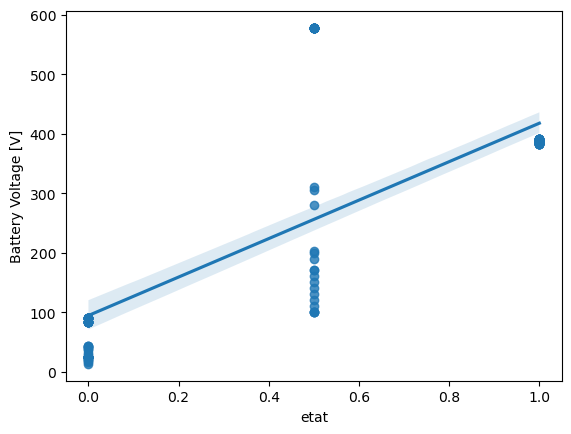

In [14]:
import seaborn as sns
sns.regplot(x="etat", y="Battery Voltage [V]", data= dt)

In [15]:
#independant and dependant faetures
X = dt.iloc[:,:-1]
Y = dt.iloc[:,-1]

In [16]:
X.head()

,Time [s],Battery Voltage [V],Motor Torque [Nm],Battery Current [A],Battery Temperature
0,0.0,390.30,0.00,-6.20,24.0
1,0.1,390.30,0.00,-6.20,24.0
2,0.2,390.33,0.38,-6.42,24.0
3,0.3,390.38,0.62,-6.77,24.0
4,0.4,390.37,0.57,-6.71,24.0


In [17]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
151    1.0
152    1.0
153    1.0
154    1.0
155    1.0
Name: etat, Length: 156, dtype: float64

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.3 , random_state = 42)

In [19]:
X_train

,Time [s],Battery Voltage [V],Motor Torque [Nm],Battery Current [A],Battery Temperature
86,8.6,382.84,41.08,-14.09,35.40
11,1.1,390.14,0.62,-8.09,24.00
60,6.0,24.00,83.30,113.30,83.30
67,6.7,386.38,1.50,-9.35,10.51
124,12.4,170.20,130.96,-130.96,65.66
...,...,...,...,...,...
71,7.1,384.86,9.00,-10.62,30.01
106,10.6,43.00,83.30,-170.20,55.61
14,1.4,577.71,100.00,100.00,-0.52
92,9.2,382.37,39.11,-14.12,39.64


In [20]:
X_test

,Time [s],Battery Voltage [V],Motor Torque [Nm],Battery Current [A],Battery Temperature
96,9.6,19.62,78.00,-160.58,89.20
69,6.9,385.32,5.38,-10.42,21.77
82,8.2,384.73,28.00,-12.23,35.78
76,7.6,385.68,17.69,-12.21,35.58
114,11.4,160.58,-130.96,120.83,70.00
29,2.9,577.67,100.00,100.00,-1.18
94,9.4,15.81,89.00,-190.31,83.09
132,13.2,385.76,6.00,-11.54,18.85
93,9.3,13.19,83.30,-200.08,64.94
139,13.9,387.46,6.00,-10.63,17.03


In [21]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

In [22]:
# tarnsform the data completly to the same scale
X_train = scaler.fit_transform(X_train)

In [23]:
#the test data don t have to know a lot about the training data so we're not gonna use fit
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 0.20276764,  0.68982377,  0.1318288 , -0.25637921, -0.43724119],
       [-1.43197148,  0.730627  , -0.49234823, -0.20022387, -0.82076552],
       [-0.36394192, -1.31590641,  0.78315737,  0.9358924 ,  1.17423384],
       [-0.21136627,  0.70961054, -0.47877246, -0.21201649, -1.27460264],
       [ 1.03103546, -0.49872395,  1.51840891, -1.35019178,  0.5807804 ],
       [-1.08322713,  1.7788228 ,  1.04078853,  0.81141471, -1.65678127],
       [ 0.90025633, -0.77467674, -2.05109383,  0.81600073,  0.73250801],
       [ 0.87845981, -0.71805528, -2.05186519,  0.81534559,  0.78263531],
       [-0.77807583, -0.94700051,  0.78315737,  0.03366316,  1.17423384],
       [-1.58454713,  0.73191258, -0.49311958, -0.18730814, -0.82076552],
       [-0.97424452, -0.94700051,  0.78315737,  1.37296819,  1.17423384],
       [ 0.18097112,  0.69127704,  0.0920271 , -0.25825106, -0.44127829],
       [ 0.98744242, -0.88836683,  1.81491614, -1.53007608,  0.63729978],
       [-0.25495931, -1.31590641,  0.7

In [25]:
#model training
from sklearn.linear_model import LinearRegression


In [26]:
regression = LinearRegression()

In [27]:
#train the model
regression.fit(X_train , Y_train)

LinearRegression()

In [28]:
 # we crate a hyper plane
 #print the coefficients ant the intercept
print(regression.coef_)


[ 0.05714886  0.36215937 -0.1435861  -0.07157638  0.00613098]


In [29]:
print(regression.intercept_)

0.5458715596330275


In [30]:
#on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [31]:
#prediction with test data
reg_pred = regression.predict(X_test)

In [32]:
#to see all the predictions
reg_pred

array([ 0.10867171,  0.86168045,  0.83067609,  0.84790836,  0.6868281 ,
        0.91292835,  0.09275759,  0.9398215 ,  0.1016357 ,  0.9509973 ,
        0.90059862,  0.80867548,  0.89573734,  0.54592456,  0.90678018,
        0.91415375,  0.53706346,  0.08409364,  0.96814853,  0.84358201,
        0.08862915,  0.89936122,  0.81148589,  0.80812031,  0.91535815,
        0.14520742,  0.86657527, -0.17163022,  0.04920579,  0.09385948,
        0.04213386,  0.96920747, -0.17067263,  0.94611619,  0.15015645,
        0.42352942,  0.63916925,  0.86888772,  0.05195816,  0.90927147,
        0.94862924,  0.84250904,  0.93721702,  0.04488622,  0.85016671,
        0.9043215 ,  0.94500578])

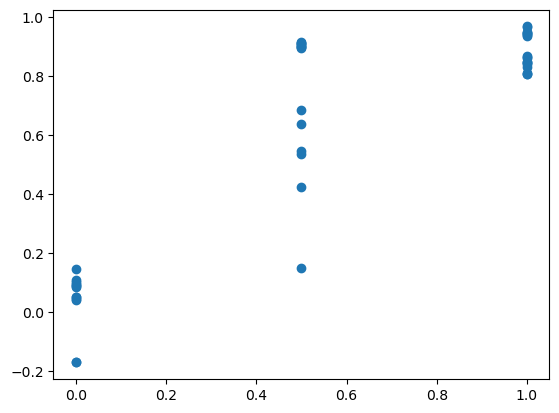

In [33]:
#plot a scatter plot for the predictions
plt.scatter(Y_test , reg_pred)

In [34]:
# calcul the error between the y and reg_pred
residuals = Y_test - reg_pred

In [35]:
residuals

96    -0.108672
69     0.138320
82     0.169324
76     0.152092
114   -0.186828
29    -0.412928
94    -0.092758
132    0.060179
93    -0.101636
139    0.049003
19    -0.400599
90     0.191325
15    -0.395737
125   -0.045925
24    -0.406780
30    -0.414154
119   -0.037063
101   -0.084094
152    0.031851
78     0.156418
98    -0.088629
18    -0.399361
12     0.188514
9      0.191880
31    -0.415358
104   -0.145207
68     0.133425
55     0.171630
51    -0.049206
97    -0.093859
45    -0.042134
147    0.030793
56     0.170673
138    0.053884
123    0.349844
128    0.076471
127   -0.139169
66     0.131112
42    -0.051958
26    -0.409271
134    0.051371
79     0.157491
131    0.062783
36    -0.044886
75     0.149833
22    -0.404322
135    0.054994
Name: etat, dtype: float64

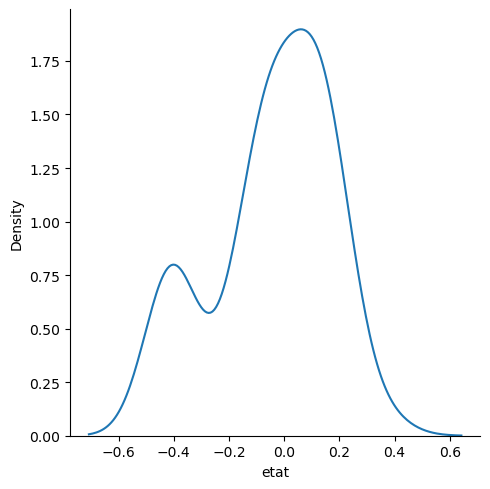

In [36]:
# plot this residuals
sns.displot(residuals , kind="kde")

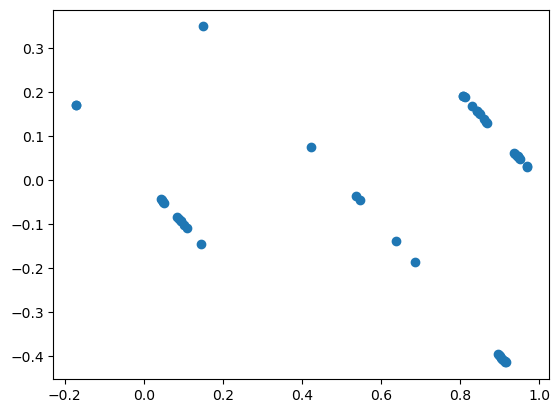

In [37]:
#scatter plot with respect to predictions and residuals the garphe not following any kind of distributions
plt.scatter(reg_pred , residuals)

In [39]:
import numpy as np
#to see how the model is bascaly perfroming
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test ,reg_pred))
print(mean_squared_error(Y_test ,reg_pred))
print(np.sqrt(mean_squared_error(Y_test ,reg_pred)))

0.16795194192561744
0.045185933000095845
0.21256983087939796


In [40]:
#check the performance of metrics
from sklearn.metrics import r2_score
score = r2_score(Y_test , reg_pred)
print(score)

0.7280225449667257


In [41]:
#display adjusted r-squared ,, <of 0.72
1 - (1 - score)*(len(Y_test) - 1)/(len(Y_test) - X_test.shape[1] - 1)

0.6948545626455946

In [42]:
# pickling the model file to deployment
# pickling the model file to deployment
import pickle

# Supposons que 'regression' est votre modèle de régression que vous souhaitez enregistrer
regression = ...  # Votre modèle de régression ici

# Enregistrement du modèle à l'aide de pickle
with open('regmodel.pkl', 'wb') as model_file:
    pickle.dump(regression, model_file)


In [ ]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))



EOFError: ignored